# Monte Carlo 

Use Monte Carlo simulation to approximate E[g(X)], compare with the exact solution to see how close it is 

In [241]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (1) Compute "area" of a triangle (0,0), (0.5,1), (1,0) == 0.5

In [256]:
size = 500    # sample size 
rx=np.zeros(size)
ry=np.zeros(size)
count = 0
for i in range(size):
    x, y =random.random(), random.random()
    rx[i]=x
    ry[i]=y
    if x<=0.5 and  y<=(2*x):
        count += 1   # count = count + 1 
    elif x>0.5 and y<=(2-2*x):
        count += 1
    else:
        count +=0
print(count/size)

0.498


In [243]:
rx.shape

(500,)

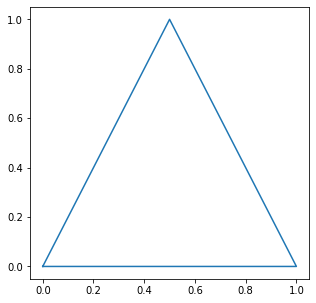

In [248]:
plt.figure(figsize=(5, 5))
x=np.array([0,1,0.5,0])
y=np.array([0,0,1,0])
triangle = plt.plot(x,y)   # Draws the triangle

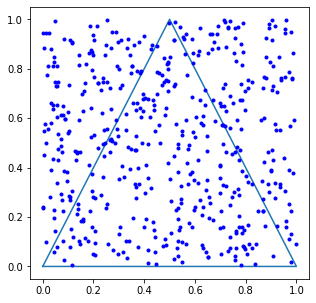

In [257]:
plt.figure(figsize=(5, 5))
x=np.array([0,1,0.5,0])
y=np.array([0,0,1,0])
triangle = plt.plot(x,y)   # Draws the triangle

plt.plot(rx, ry,'b.')  # Draws the uniformly distributed random dots.
# plt.ylim(-0.1, 1.5)
# plt.xlim(-0.1, 1.1)

# (2A) Pure Python: Simulation value of "pi = = 3.14159"

In [258]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [259]:
n = 10000
mcs_pi_py(n)

3.1384

# (2B) Numpy: Simulation value of "pi = = 3.14159"

In [261]:
import numpy as np
import numpy.random as npr 

size = 100000
count = 0
for i in range(size):
    x, y = np.random.rand(), np.random.rand()
    z = (x**2+y**2)**0.5
    c = np.where(z<=1, 1, 0)
    count += c
print(4*count/size)

3.14168


In [268]:
# run 100 times, each run has sample_size = 1000 (say) 

run = 1000
sample_size = 10000
pi = np.zeros(run)
count = np.zeros(run)
x = npr.rand(sample_size, run)
y = npr.rand(sample_size, run)
z = npr.rand(sample_size, run)
for j in range(run):
    c = 0
    for i in range(sample_size):
        z[i,j] = (x[i,j]**2 + y[i,j]**2)**0.5
        c = np.where(z[i,j]<=1, 1, 0)
        count[j] += c
    pi[j] = 4*count[j]/sample_size


# print(pi)
print(np.mean(pi))

3.1409255999999997


In [264]:
y.shape

(1000, 100)

# (2C) Numpy: Simulation value of "pi = = 3.14159"

The code examples is taken from Stack Exchange 
(https://codereview.stackexchange.com/questions/69370/monte-carlo-pi-calculation)

In [269]:
import random
import numpy as np
from pylab import mpl, plt
%matplotlib inline

In [270]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)
      for _ in range(500)]

In [272]:
rn = np.array(rn)
rn.shape

(500, 2)

In [278]:
plt.Rectangle?

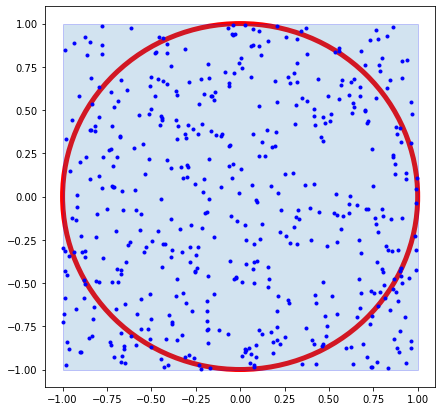

In [283]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='r', lw=5.0,
                  facecolor='None')   # Draws the unit circle.
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.2)  # Draws the square with side length of 2.
ax.add_patch(circ)   # Draws the unit circle.
ax.add_patch(box)    # Draws the square with side length of 2.

plt.plot(rn[:, 0], rn[:, 1], 'b.')  # Draws the uniformly distributed random dots.
#plt.ylim(-1.1, 1.1)
#plt.xlim(-1.1, 1.1)

In [284]:
#  plt.Rectangle?

In [285]:
# The distance of the points from the origin (Euclidean norm).
distance = np.sqrt((rn ** 2).sum(axis=1))   # axis=1 指 x 軸 
distance[:8].round(3)

array([0.273, 0.912, 0.948, 0.447, 1.056, 1.303, 0.627, 1.019])

In [286]:
len(distance)

500

In [287]:
# The fraction of those points on the circle relative to all points.
frac = (distance <= 1.0).sum() / len(distance)

In [232]:
# This accounts for the square area of 4 for the estimation of the circle area and therewith of π.
pi_mcs = frac * 4
pi_mcs

3.1216

# (3) Monte Carlo: int_(-10)^x cos(t)dt = sin(x)-sin(-10)

sin(-10)+int_(-10}^x cos(t)dt = sin(x)  

(left: sample; right: emsemble)  

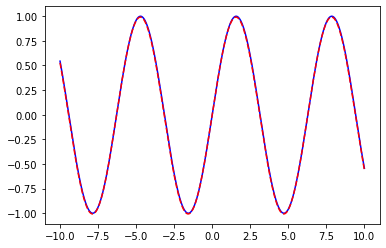

In [291]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

N = 1000
a=-10
b=10
t = np.linspace(a, b, N)
true_y = np.sin(t)
sample_y = np.sin(a) + (b-a)*np.cumsum(np.cos(t))/N

plt.plot(t,true_y, 'b-')
plt.plot(t,sample_y,'r--')

# (4) Monte Carlo: int_(-4)^x  cos(2* pi* t)dt = [sin(2* pi* x) - sin(2* pi* (-4))]/(2 * pi))

(left: sample; right: emsemble)

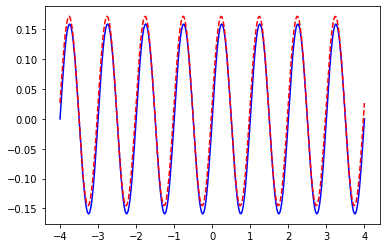

In [295]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt


N = 300
a = -4
b = 4
t = np.linspace(a, b, N)
true_y = (np.sin(2*pi*t)-np.sin(2*pi*a))/(2*pi)

sample_y = (b-a)*np.cumsum(np.cos(2*pi*t))/N

plt.plot(t,true_y, 'b-')
plt.plot(t,sample_y,'r--')

# (5) E[cos(2 * pi * F * t)] 


A sinusoid with random frequency X(t)=cos(2*pi*F*t), where F is a U(0, f0) random variable.

We want to find the mean function  E[cos(2 * pi * F * t)]

E[cos(2 * pi * F * t)] = (1/fo)*int_0^(fo) cos(2 * pi * f * t)df  = sin(2 * pi * fo * t)/(2 * pi * fo * t) 

Text(0.5, 1.0, 'the sample mean')

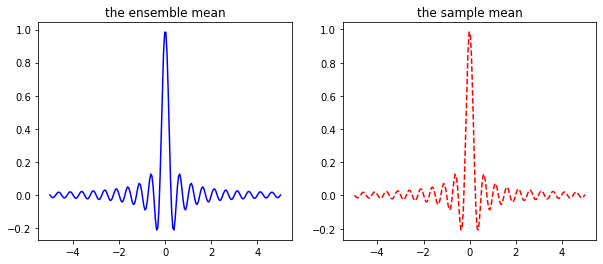

In [296]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

N=200
fo=2
a=-5
b=5
true_y=np.zeros(N)
sum_y=np.zeros(N)
sample_y=np.zeros(N)
sample=np.zeros(N)

t = np.linspace(a, b, N)   # n interval of t  
x = np.linspace(0,1,N)     # interval of F 
F=fo*x
for i in range(1, N):
    true_y[i] = np.sin(2*pi*fo*t[i])/(2*pi*fo*t[i])
    for j in range(N):
        sample[i] = sample[i] + (np.cos(2*pi*F[j]*t[i]))
    sample_y[i] = sample[i]/N

    
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t,true_y, 'b-')
plt.title('the ensemble mean')
plt.subplot(122)
plt.plot(t,sample_y,'r--')
plt.title('the sample mean')